In [20]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager

In [8]:
df = pd.read_csv('A_stat_data_112.csv')
df2 = df.copy()

In [9]:
df2.head()

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072


In [10]:
df_DiffAndPass = df2[['first_correct_rate', 'mission_difficulty']].dropna()
df_DiffAndPass.head()
df_DiffAndPass.to_csv("DiffAndPass.csv", index=False)

## 困難題圖形

In [11]:
df_hard = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("難", na=False)]
df_hard.tail()
LensOfHard = len(df_hard)

In [12]:
import plotly.express as px
import plotly.graph_objects as go

# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_hard['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_hard['first_correct_rate'].mean()
mean_rate_hard = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (難)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()


## 中等題圖形

In [13]:
df_mid = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("中", na=False)]
df_mid.tail()
LensOfMid = len(df_mid)

In [14]:
import plotly.express as px
import plotly.graph_objects as go

# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_mid['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_mid['first_correct_rate'].mean()
mean_rate_mid = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (中)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()


## 簡易題圖形

In [15]:
df_easy = df_DiffAndPass[df_DiffAndPass["mission_difficulty"].str.contains("易", na=False)]
df_easy.tail()
LensOfEasy = len(df_easy)

In [16]:
import plotly.express as px
import plotly.graph_objects as go

# 計算 first_correct_rate 每個值的出現次數
rate_counts = df_easy['first_correct_rate'].value_counts().reset_index()
rate_counts.columns = ['first_correct_rate', 'count']

# 按 first_correct_rate 數值排序
rate_counts = rate_counts.sort_values(by='first_correct_rate')

# 計算 first_correct_rate 的平均值
mean_rate = df_easy['first_correct_rate'].mean()
mean_rate_ez = mean_rate
# 繪製長條圖
fig = px.bar(rate_counts, x='first_correct_rate', y='count', 
             title="First Correct Rate (易)", 
             labels={'first_correct_rate': 'First Correct Rate', 'count': '出現次數'})

# 加入平均線
fig.add_trace(go.Scatter(x=[mean_rate, mean_rate], y=[0, rate_counts['count'].max()],
                         mode="lines",
                         name="平均線",
                         line=dict(color="red", dash="dash")))

# 更新圖表的標籤
fig.update_layout(yaxis_title="出現次數", xaxis_title="First Correct Rate")
fig.show()


In [17]:
print(mean_rate_ez)
print(mean_rate_mid)
print(mean_rate_hard)
#print(LensOfEasy,LensOfMid,LensOfHard)

0.47508006578377904
0.4534720475411898
0.43858718797653556


C:\Users\mason\AppData\Local\Temp\ipykernel_3912\2038025998.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\mason\Desktop\作業\通識\學習分析工具\LATIA113-1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from font(s) DejaVu Sans.

c:\Users\mason\Desktop\作業\通識\學習分析工具\LATIA113-1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.

c:\Users\mason\Desktop\作業\通識\學習分析工具\LATIA113-1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from font(s) DejaVu Sans.



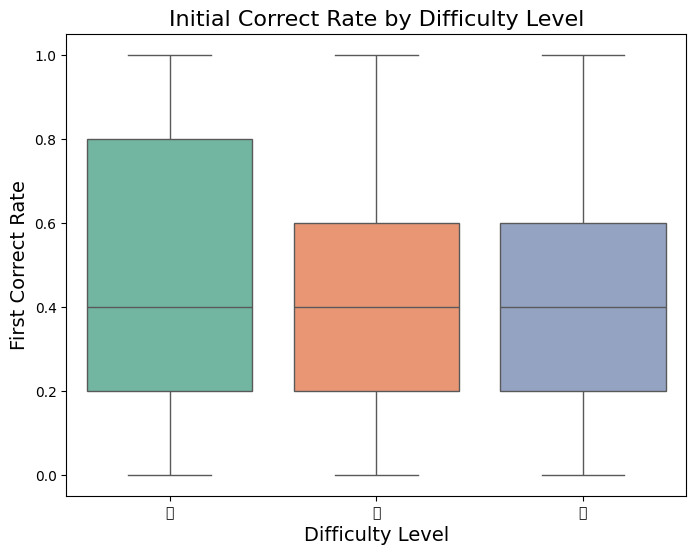

ANOVA p-value: 1.2003713636168536e-148


In [25]:
data = df_DiffAndPass

# 分組資料
groups = data.groupby('mission_difficulty')['first_correct_rate'].apply(list)

# ANOVA 分析
anova_result = stats.f_oneway(*groups)
anova_result_pvalue = anova_result.pvalue

# 繪製箱線圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=data, palette='Set2')
plt.title('Initial Correct Rate by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('First Correct Rate', fontsize=14)
plt.show()

# 印出 p-value 結果
print(f"ANOVA p-value: {anova_result_pvalue}")


# 解釋
### ANOVA 之P-Value小於信心水準顯著性水準 (𝛼) 為 0.05，因此我們拒絕零假設，每個問題的難度差距以及答對率的關聯是顯著的，即該題目設計之難度正確無誤。